In [11]:
import torch
import os

# モデルをロードする関数
def load_model(checkpoint_path, model_class, config_class):
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    
    # コンフィグを復元
    config = config_class(**checkpoint['model_args'])
    model = model_class(config)
    
    # state_dictのキーを修正
    state_dict = checkpoint['model']
    new_state_dict = {k.replace("_orig_mod.", ""): v for k, v in state_dict.items()}
    
    # 修正済みのstate_dictをロード
    model.load_state_dict(new_state_dict)
    model.eval()  # 評価モードに切り替え
    
    return model, config

# 次のトークン予測を行う関数
def predict_next_token(model, tokenizer, input_text, max_new_tokens=1, temperature=1.0, top_k=None):
    # テキストをトークン化
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    # モデルで予測
    with torch.no_grad():
        generated_ids = model.generate(input_ids, max_new_tokens=max_new_tokens, temperature=temperature, top_k=top_k)
    # トークンをテキストに変換
    output_text = tokenizer.decode(generated_ids[0])
    return output_text

# 使用するファイルパス
checkpoint_path = "ckpt_5000.pt"  # チェックポイントファイルのパス

# モデルと設定をロード
from transformers import GPT2Tokenizer

# nanoGPTのモデル定義をインポート
from model import GPT, GPTConfig

model, config = load_model(checkpoint_path, GPT, GPTConfig)

# トークナイザをセットアップ（GPT-2のトークナイザを使用）
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")



number of parameters: 123.59M
Input Text: Every morning, the man she
Predicted Text: Every morning, the man she said to me, "tell him,
"


In [87]:
# 入力テキスト。現在形を予測させたい
input_text = "Oh"

# 次のトークンを予測
for i in range(10):
    predicted_text = predict_next_token(model, tokenizer, input_text, max_new_tokens=10, temperature=0.8, top_k=50)
    print(predicted_text)

Oh of his
heart a man from a man,
Oh.
what do you think?
why don
Oh
who's that?
let's have a
Oh, with a big nose.
- what's
Oh,
louis of a chinese girl
Oh with this, even in the
satisfaction
Oh.
oh, yes.
i was going
Oh, a long way from the
benediction
Oh the door.
then they were gone.

Oh, and it was all gone.
oh,


In [4]:
import torch
import os
import numpy as np
from model import GPT, GPTConfig 

# モデルをロードする関数
def load_model(checkpoint_path, model_class, config_class):
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    
    # コンフィグを復元
    config = config_class(**checkpoint['model_args'])
    model = model_class(config)
    
    # state_dictのキーを修正
    state_dict = checkpoint['model']
    new_state_dict = {k.replace("_orig_mod.", ""): v for k, v in state_dict.items()}
    
    # 修正済みのstate_dictをロード
    model.load_state_dict(new_state_dict)
    model.eval()  # 評価モードに切り替え
    
    return model, config

# 文法的な正しさを比較する関数
def compare_sentences(model, tokenizer, sentence_a, sentence_b):
    # それぞれの文をトークン化
    tokens_a = tokenizer.encode(sentence_a, return_tensors='pt')
    tokens_b = tokenizer.encode(sentence_b, return_tensors='pt')

    # 次のトークンの予測確率を計算
    with torch.no_grad():
        logits_a, _ = model(tokens_a[:, :-1], tokens_a[:, 1:])  # 入力とターゲットを分離
        logits_b, _ = model(tokens_b[:, :-1], tokens_b[:, 1:])

    # クロスエントロピー損失を計算
    loss_a = torch.nn.functional.cross_entropy(
        logits_a.view(-1, logits_a.size(-1)), tokens_a[:, 1:].view(-1), ignore_index=-1
    )
    loss_b = torch.nn.functional.cross_entropy(
        logits_b.view(-1, logits_b.size(-1)), tokens_b[:, 1:].view(-1), ignore_index=-1
    )

    # 損失が小さい方が文法的に正しいと判断
    if loss_a < loss_b:
        return "A is more grammatically correct."
    elif loss_a > loss_b:
        return "B is more grammatically correct."
    else:
        return "Both sentences are equally correct."

# 使用するファイルパス
checkpoint_path = "ckpt_5000.pt"  # チェックポイントファイルのパス

# モデルと設定をロード
from transformers import GPT2Tokenizer

# nanoGPTのモデル定義をインポート
from model import GPT, GPTConfig

model, config = load_model(checkpoint_path, GPT, GPTConfig)

# トークナイザをセットアップ（GPT-2のトークナイザを使用）
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# 比較する文
sentence_a = "The cat sits on the mat."
sentence_b = "The cat sit on the mat."

# 文法チェック結果を取得
result = compare_sentences(model, tokenizer, sentence_a, sentence_b)

# 結果を表示
print("Result:", result)


c:\Users\masak\anaconda3\envs\env310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\masak\anaconda3\envs\env310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\masak\anaconda3\envs\env310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\m

number of parameters: 123.59M
Result: A is more grammatically correct.


In [29]:
import torch
import os
import numpy as np

# モデルをロードする関数
def load_model(checkpoint_path, model_class, config_class):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    checkpoint = torch.load(checkpoint_path, map_location=device)
    
    # コンフィグを復元
    config = config_class(**checkpoint['model_args'])
    model = model_class(config)
    
    # state_dictのキーを修正
    state_dict = checkpoint['model']
    new_state_dict = {k.replace("_orig_mod.", ""): v for k, v in state_dict.items()}
    
    # 修正済みのstate_dictをロード
    model.load_state_dict(new_state_dict)
    model.eval()  # 評価モードに切り替え
    model.to(device)  # デバイスに移動
    
    return model, config

# 文法的な正しさを比較する関数
def compare_sentences(model, tokenizer, sentence_a, sentence_b):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # それぞれの文をトークン化
    tokens_a = tokenizer.encode(sentence_a, return_tensors='pt').to(device)
    tokens_b = tokenizer.encode(sentence_b, return_tensors='pt').to(device)

    # 次のトークンの予測確率を計算
    with torch.no_grad():
        logits_a, _ = model(tokens_a[:, :-1], tokens_a[:, 1:])  # 入力とターゲットを分離
        logits_b, _ = model(tokens_b[:, :-1], tokens_b[:, 1:])

    # クロスエントロピー損失を計算
    loss_a = torch.nn.functional.cross_entropy(
        logits_a.view(-1, logits_a.size(-1)), tokens_a[:, 1:].view(-1), ignore_index=-1
    )
    loss_b = torch.nn.functional.cross_entropy(
        logits_b.view(-1, logits_b.size(-1)), tokens_b[:, 1:].view(-1), ignore_index=-1
    )

    return loss_a.item(), loss_b.item()

# 全チェックポイントで処理を行う関数
def process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, model_class, config_class, tokenizer):
    results = []

    for checkpoint_num in range(5000, max_checkpoint + 1, 100):
        #ファイルが存在したら実行
        if not os.path.exists(base_checkpoint_path.replace("XXXX", str(checkpoint_num))):
            break
        checkpoint_path = base_checkpoint_path.replace("XXXX", str(checkpoint_num))
        print(f"Processing checkpoint {checkpoint_path}...")

        # モデルをロード
        model, _ = load_model(checkpoint_path, model_class, config_class)

        # ファイルを一行ずつ比較
        with open(file_a, 'r') as f_a, open(file_b, 'r') as f_b:
            lines_a = f_a.readlines()
            lines_b = f_b.readlines()

        assert len(lines_a) == len(lines_b), "Both files must have the same number of lines."

        checkpoint_results = []
        for line_a, line_b in zip(lines_a, lines_b):
            loss_a, loss_b = compare_sentences(model, tokenizer, line_a.strip(), line_b.strip())
            checkpoint_results.append([loss_a, loss_b])

        results.append(np.array(checkpoint_results))

    # 結果をファイルに保存
    np.save(output_file, np.array(results))

# 使用するファイルパス
base_checkpoint_path = os.path.join("./", "ckpt_XXXX_impossible.pt")  # チェックポイントのベースパス

file_a = "../babylm_data/test_1_reordered.txt"  # 比較するファイルA
file_b = "../babylm_data/test_1_short.txt"  # 比較するファイルB
output_file = "results_impossible.npy"  # 結果を保存するファイル
max_checkpoint = 10000  # 最大のチェックポイント番号

# モデルと設定をロード
from transformers import GPT2Tokenizer

# nanoGPTのモデル定義をインポート
from model import GPT, GPTConfig

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# 処理を実行
process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, GPT, GPTConfig, tokenizer)


Processing checkpoint ./ckpt_5000_impossible.pt...


C:\Users\masak\AppData\Local\Temp\ipykernel_28312\175658611.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)

number of parameters: 123.59M


AttributeError: 'tuple' object has no attribute 'logits'

In [62]:
import os
import torch
import numpy as np
from transformers import GPT2Tokenizer
from model import GPT, GPTConfig

def load_model(checkpoint_path, model_class, config_class):
    """
    Load a model from a checkpoint.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    checkpoint = torch.load(checkpoint_path, map_location=device)

    # Restore configuration and model
    config = config_class(**checkpoint['model_args'])
    model = model_class(config)

    # Fix state_dict keys and load weights
    state_dict = {k.replace("_orig_mod.", ""): v for k, v in checkpoint['model'].items()}
    model.load_state_dict(state_dict)
    model.eval()
    model.to(device)

    return model

def calculate_sentence_probability(sentence_tokens, model):
    """
    Calculate the probability of a given sentence using a GPT-2 model.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    tokenize_input = torch.tensor(sentence_tokens, dtype=torch.long).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(tokenize_input, labels=tokenize_input)
        loss = outputs.loss

    return torch.exp(-loss).item()

def compare_sentences(model, sentence_tokens_a, sentence_tokens_b):
    """
    Compare two sentences by calculating their probabilities using a GPT model.
    """
    prob_a = calculate_sentence_probability(sentence_tokens_a, model)
    prob_b = calculate_sentence_probability(sentence_tokens_b, model)
    return prob_a, prob_b

def process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, model_class, config_class):
    """
    Process multiple checkpoints and compare sentences from two encoded binary files.
    """
    results = []

    for checkpoint_num in range(5000, max_checkpoint + 1, 100):
        checkpoint_path = base_checkpoint_path.replace("XXXX", str(checkpoint_num))
        if not os.path.exists(checkpoint_path):
            break

        print(f"Processing checkpoint {checkpoint_path}...")

        # Load model
        model = load_model(checkpoint_path, model_class, config_class)

        # Read and decode input files
        lines_a = np.fromfile(file_a, dtype=np.uint16).reshape(-1, 1)
        lines_b = np.fromfile(file_b, dtype=np.uint16).reshape(-1, 1)

        if len(lines_a) != len(lines_b):
            raise ValueError("Both files must have the same number of lines.")

        # Compare sentences
        checkpoint_results = [
            compare_sentences(model, line_a.tolist(), line_b.tolist())
            for line_a, line_b in zip(lines_a, lines_b)
        ]

        results.append(np.array(checkpoint_results))

    # Save results
    np.save(output_file, np.array(results))

if __name__ == "__main__":
    # Define file paths and parameters
    base_checkpoint_path = "./ckpt_XXXX_impossible.pt"
    file_a = "../babylm_data/babylm_data_possible/test.bin"
    file_b = "../babylm_data/babylm_data_impossible/test.bin"
    output_file = "results_impossible.npy"
    max_checkpoint = 10000

    # Initialize tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

    # Process checkpoints
    process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, GPT, GPTConfig)

Processing checkpoint ./ckpt_5000_impossible.pt...


C:\Users\masak\AppData\Local\Temp\ipykernel_28312\2864571118.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=devic

number of parameters: 123.59M


ValueError: Both files must have the same number of lines.

In [68]:
import os
import torch
import numpy as np
from transformers import GPT2Tokenizer
from model import GPT, GPTConfig

def load_model(checkpoint_path, model_class, config_class):
    """
    Load a model from a checkpoint.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    checkpoint = torch.load(checkpoint_path, map_location=device)

    # Restore configuration and model
    config = config_class(**checkpoint['model_args'])
    model = model_class(config)

    # Fix state_dict keys and load weights
    state_dict = {k.replace("_orig_mod.", ""): v for k, v in checkpoint['model'].items()}
    model.load_state_dict(state_dict)
    model.eval()
    model.to(device)

    return model

def calculate_sentence_probability(sentence_tokens, model):
    """
    Calculate the probability of a given sentence using a GPT-2 model.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    tokenize_input = torch.tensor(sentence_tokens, dtype=torch.long).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(tokenize_input, labels=tokenize_input)
        loss = outputs.loss

    return torch.exp(-loss).item()

def compare_sentences(model, sentence_tokens_a, sentence_tokens_b):
    """
    Compare two sentences by calculating their probabilities using a GPT model.
    """
    prob_a = calculate_sentence_probability(sentence_tokens_a, model)
    prob_b = calculate_sentence_probability(sentence_tokens_b, model)
    return prob_a, prob_b

def process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, model_class, config_class, tokenizer):
    """
    Process multiple checkpoints and compare sentences from two text files.
    """
    results = []

    for checkpoint_num in range(5000, max_checkpoint + 1, 100):
        checkpoint_path = base_checkpoint_path.replace("XXXX", str(checkpoint_num))
        if not os.path.exists(checkpoint_path):
            break

        print(f"Processing checkpoint {checkpoint_path}...")

        # Load model
        model = load_model(checkpoint_path, model_class, config_class)

        # Read and tokenize input files
        with open(file_a, 'r', encoding='utf-8') as f:
            lines_a = [tokenizer.encode(line.strip(), add_special_tokens=True) for line in f]

        with open(file_b, 'r', encoding='utf-8') as f:
            lines_b = [tokenizer.encode(line.strip(), add_special_tokens=True) for line in f]

        if len(lines_a) != len(lines_b):
            raise ValueError("Both files must have the same number of lines.")

        # Compare sentences
        checkpoint_results = [
            compare_sentences(model, line_a, line_b)
            for line_a, line_b in zip(lines_a, lines_b)
        ]

        results.append(np.array(checkpoint_results))

    # Save results
    np.save(output_file, np.array(results))

if __name__ == "__main__":
    # Define file paths and parameters
    base_checkpoint_path = "./ckpt_XXXX_impossible.pt"
    file_a = "../babylm_data/test_1_short.txt"
    file_b = "../babylm_data/test_1_reordered.txt"
    output_file = "results_impossible.npy"
    max_checkpoint = 10000

    # Initialize tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

    # Process checkpoints
    process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, GPT, GPTConfig, tokenizer)


Processing checkpoint ./ckpt_5000_impossible.pt...


C:\Users\masak\AppData\Local\Temp\ipykernel_28312\2720167481.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=devic

number of parameters: 123.59M


TypeError: GPT.forward() got an unexpected keyword argument 'labels'

In [89]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 GB 37.6 MB/s eta 0:01:07
     ---------------------------------------- 0.0/2.5 GB 28.2 MB/s eta 0:01:29
     ---------------------------------------- 0.0/2.5 GB 25.4 MB/s eta 0:01:39
     ---------------------------------------- 0.0/2.5 GB 23.7 MB/s eta 0:01:46
     ---------------------------------------- 0.0/2.5 GB 22.9 MB/s eta 0:01:49
     ---------------------------------------- 0.0/2.5 GB 22.3 MB/s eta 0:01:52
      --------------------------------------- 0.0/2.5 GB 21.8 MB/s eta 0:01:54
      --------------------------------------- 0.0/2.5 GB 21.5 MB/s eta 0:01:56
      --------------------------------------- 0.0/2.5 GB 20.9 MB/s eta 0:01:59
      --------------------------------------- 0.0/2.5 GB 20.9 MB/s eta 0:01:58
      --------------------------------------- 0.0/2.5 GB 20.8 MB/s eta 0:01:59
 

In [1]:
import torch
torch.__version__

'2.5.1+cu124'

In [2]:
import torch

# CUDAが利用可能か確認
print("CUDA available:", torch.cuda.is_available())

# 利用可能なGPU名を表示
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected")


CUDA available: True
GPU Name: NVIDIA GeForce RTX 4070 Laptop GPU


In [2]:
import torch
import os
import numpy as np

print('Start processing')
dataset = "..\\babylm_data"  # データセットのディレクトリ
output_file = "results_impossible_4.npy"  # 結果を保存するファイル
model_path = '..\\impossible_models'  # チェックポイントのベースパス

# モデルをロードする関数
def load_model(checkpoint_path, model_class, config_class):
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cuda'))
    
    # コンフィグを復元
    config = config_class(**checkpoint['model_args'])
    model = model_class(config)
    
    # state_dictのキーを修正
    state_dict = checkpoint['model']
    new_state_dict = {k.replace("_orig_mod.", ""): v for k, v in state_dict.items()}
    
    # 修正済みのstate_dictをロード
    model.load_state_dict(new_state_dict)
    model.eval()  # 評価モードに切り替え
    model.to('cuda')  # GPUに移動
    
    return model, config

# 文法的な正しさを比較する関数
def compare_sentences(model, tokenizer, sentence_a, sentence_b):
    # それぞれの文をトークン化
    tokens_a = tokenizer.encode(sentence_a, return_tensors='pt').to('cuda')
    tokens_b = tokenizer.encode(sentence_b, return_tensors='pt').to('cuda')

    # 次のトークンの予測確率を計算
    with torch.no_grad():
        logits_a, _ = model(tokens_a[:, :-1], tokens_a[:, 1:])  # 入力とターゲットを分離
        logits_b, _ = model(tokens_b[:, :-1], tokens_b[:, 1:])

    # クロスエントロピー損失を計算
    loss_a = torch.nn.functional.cross_entropy(
        logits_a.view(-1, logits_a.size(-1)), tokens_a[:, 1:].view(-1), ignore_index=-1
    )
    loss_b = torch.nn.functional.cross_entropy(
        logits_b.view(-1, logits_b.size(-1)), tokens_b[:, 1:].view(-1), ignore_index=-1
    )

    return loss_a.item(), loss_b.item()

# 全チェックポイントで処理を行う関数
def process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, model_class, config_class, tokenizer):
    results = []

    for checkpoint_num in range(0, max_checkpoint + 1, 10):
        #ファイルが存在したら実行
        if not os.path.exists(base_checkpoint_path.replace("XXXX", str(checkpoint_num))):
            print(f"Checkpoint {checkpoint_num} not found.")
            break
        checkpoint_path = base_checkpoint_path.replace("XXXX", str(checkpoint_num))
        print(f"Processing checkpoint {checkpoint_num}...")

        # モデルをロード
        model, _ = load_model(checkpoint_path, model_class, config_class)

        # ファイルを一行ずつ比較
        with open(file_a, 'r') as f_a, open(file_b, 'r') as f_b:
            lines_a = f_a.readlines()
            lines_b = f_b.readlines()

        assert len(lines_a) == len(lines_b), "Both files must have the same number of lines."

        checkpoint_results = []
        for line_a, line_b in zip(lines_a, lines_b):
            loss_a, loss_b = compare_sentences(model, tokenizer, line_a.strip(), line_b.strip())
            checkpoint_results.append([loss_a, loss_b])

        results.append(np.array(checkpoint_results))

    # 結果をファイルに保存
    np.save(output_file, np.array(results))
    print("Results saved to", output_file)

# 使用するファイルパス
base_checkpoint_path = os.path.join(model_path, "ckpt_XXXX.pt")  # チェックポイントのベースパス

# data_dir = os.path.join('data', dataset)
data_dir = dataset
file_a = os.path.join(data_dir, f"test_1_short.txt")  # 比較するファイルA
file_b = os.path.join(data_dir, f"test_1_reordered.txt")  # 比較するファイルB
max_checkpoint = 10000  # 最大のチェックポイント番号

# モデルと設定をロード
from transformers import GPT2Tokenizer

# nanoGPTのモデル定義をインポート
from model import GPT, GPTConfig

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# 処理を実行
process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, GPT, GPTConfig, tokenizer)


Start processing
Processing checkpoint 0...


C:\Users\masak\AppData\Local\Temp\ipykernel_26920\1350202939.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch

number of parameters: 123.59M
Processing checkpoint 10...
number of parameters: 123.59M
Processing checkpoint 20...
number of parameters: 123.59M
Processing checkpoint 30...
number of parameters: 123.59M
Processing checkpoint 40...
number of parameters: 123.59M
Processing checkpoint 50...
number of parameters: 123.59M
Processing checkpoint 60...
number of parameters: 123.59M
Processing checkpoint 70...
number of parameters: 123.59M
Processing checkpoint 80...
number of parameters: 123.59M
Processing checkpoint 90...
number of parameters: 123.59M
Processing checkpoint 100...
number of parameters: 123.59M
Processing checkpoint 110...
number of parameters: 123.59M
Processing checkpoint 120...
number of parameters: 123.59M
Processing checkpoint 130...
number of parameters: 123.59M
Processing checkpoint 140...
number of parameters: 123.59M
Processing checkpoint 150...
number of parameters: 123.59M
Processing checkpoint 160...
number of parameters: 123.59M
Processing checkpoint 170...
number

(15, 6191, 2)
Correct A: 58746
Correct B: 33879


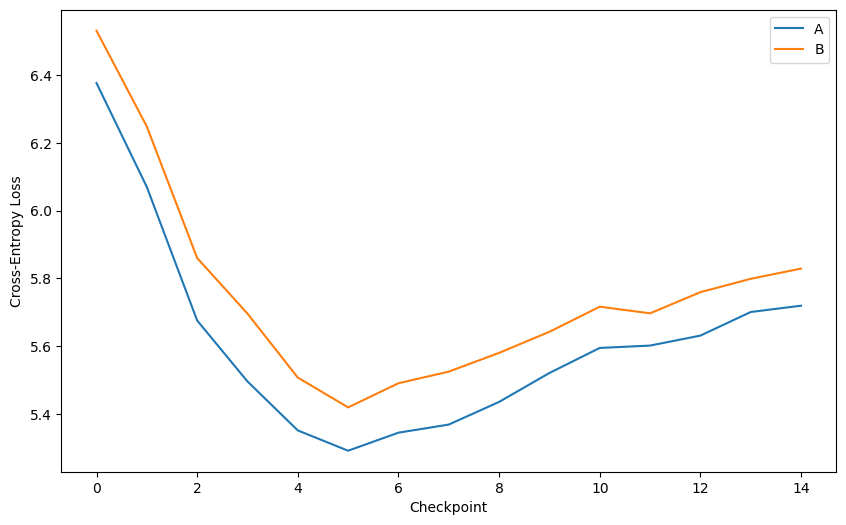

(15, 6191, 2)


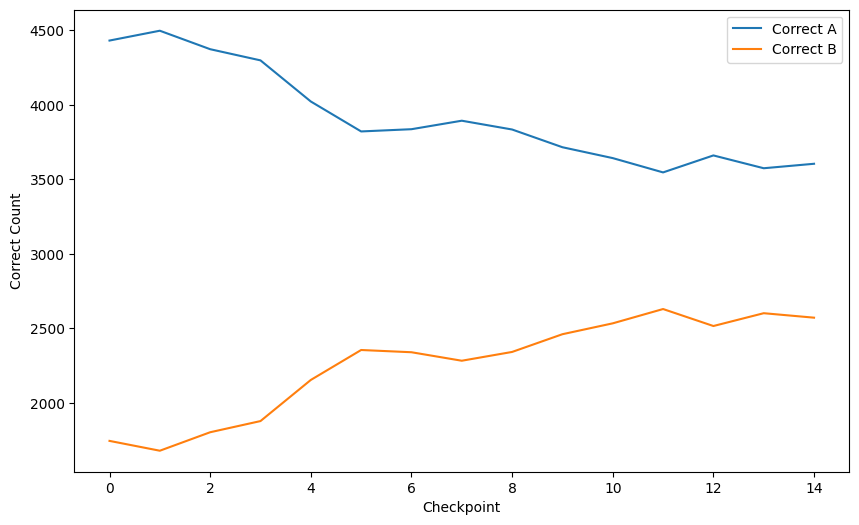

(15, 6191, 2)
Correct A: 86449
Correct B: 6176


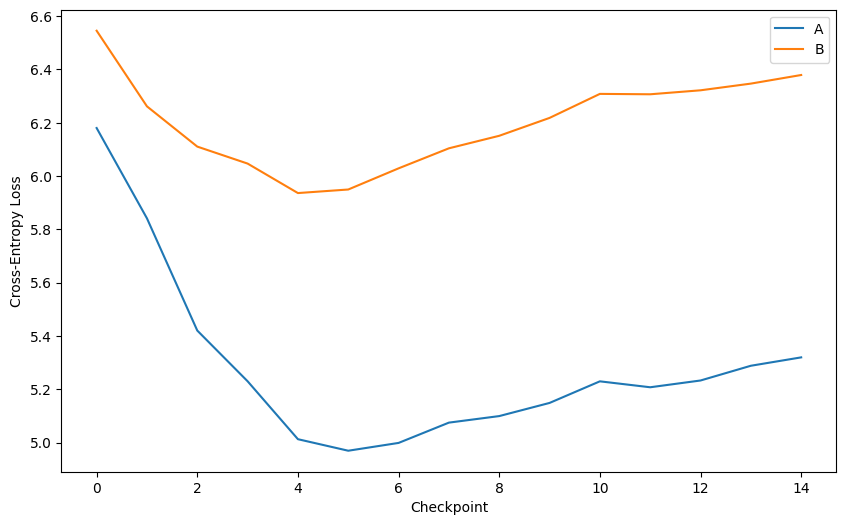

(15, 6191, 2)


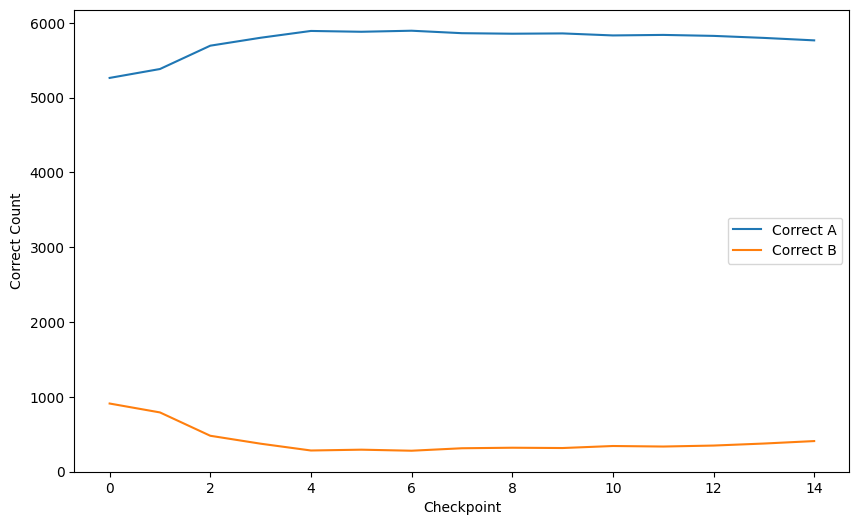

(50, 6191, 2)
Correct A: 104897
Correct B: 203853


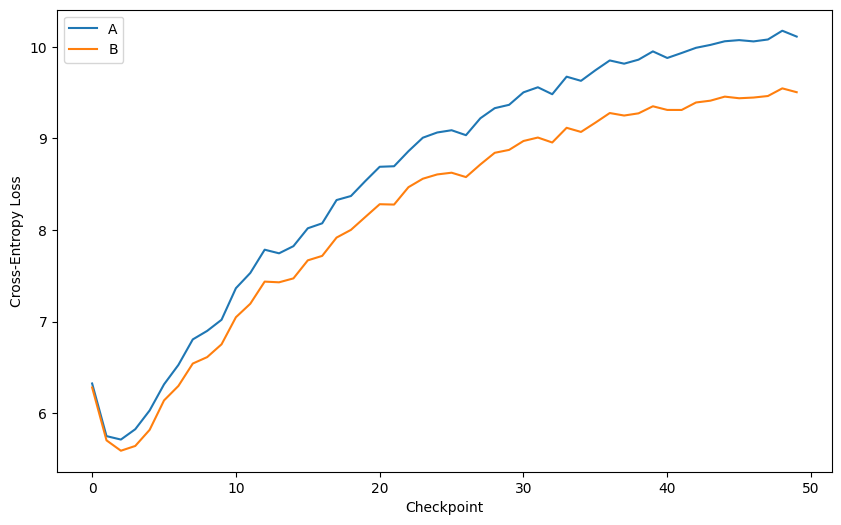

(50, 6191, 2)


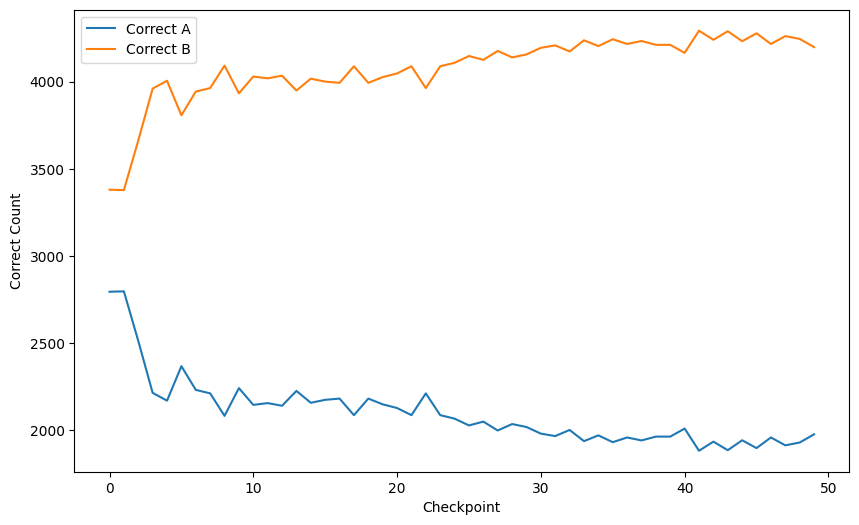

(50, 6191, 2)
Correct A: 274554
Correct B: 34196


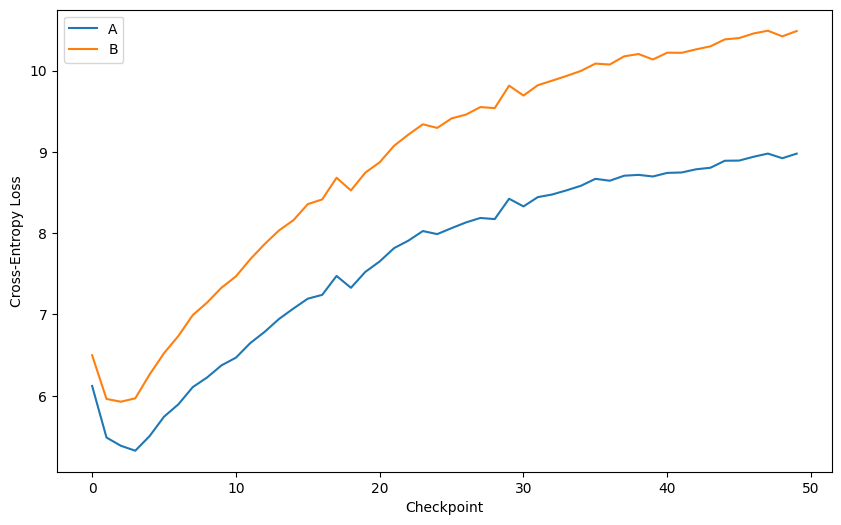

(50, 6191, 2)


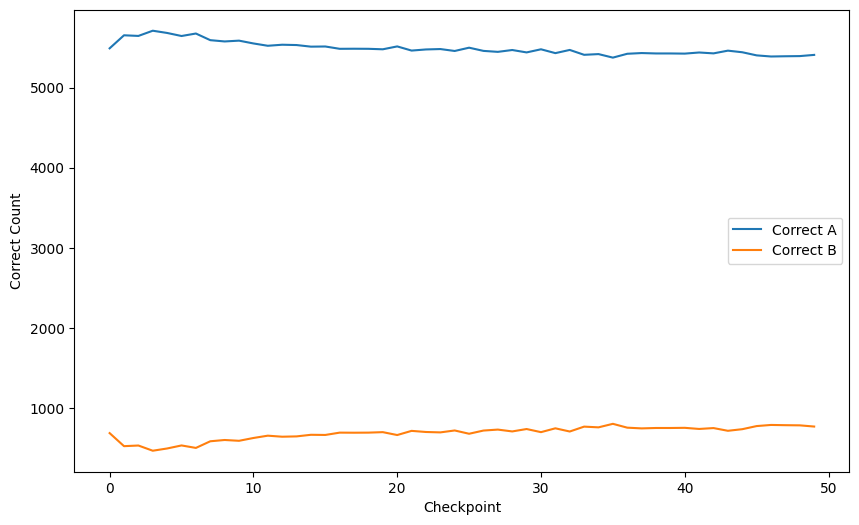

In [36]:
#resultを確認
import numpy as np

def load_process_create_figure(results_file):
    results = np.load(results_file, allow_pickle=True)
    print(results.shape)

    # 損失が小さい方が文法的に正しいと判断
    correct_a = np.sum(results[:, :, 0] < results[:, :, 1])
    correct_b = np.sum(results[:, :, 0] > results[:, :, 1])

    print("Correct A:", correct_a)
    print("Correct B:", correct_b)

    # 結果をプロット
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(results[:, :, 0].mean(axis=1), label="A")
    plt.plot(results[:, :, 1].mean(axis=1), label="B")
    plt.xlabel("Checkpoint")
    plt.ylabel("Cross-Entropy Loss")
    plt.legend()
    plt.show()

#どちらが正しいかの累計を確認
def load_process_create_figure_2(results_file):
    results = np.load(results_file, allow_pickle=True)
    print(results.shape)

    # 損失が小さい方が文法的に正しいと判断[:, :, 0] < results[:, :, 1]
    correct_a = np.sum(results[:, :, 0] < results[:, :, 1], axis=1)
    correct_b = np.sum(results[:, :, 0] > results[:, :, 1], axis=1)

    # 結果をプロット
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(correct_a, label="Correct A")
    plt.plot(correct_b, label="Correct B")
    plt.xlabel("Checkpoint")
    plt.ylabel("Correct Count")
    plt.legend()
    plt.show()

load_process_create_figure("results_impossible.npy")
load_process_create_figure_2("results_impossible.npy")
load_process_create_figure("results_possible.npy")
load_process_create_figure_2("results_possible.npy")
load_process_create_figure("..\\results_impossible_2.npy")
load_process_create_figure_2("..\\results_impossible_2.npy")
load_process_create_figure("..\\results_possible_2.npy")
load_process_create_figure_2("..\\results_possible_2.npy")

In [ ]:
def load_process_create_figure_2(results_file):
    results = np.load(results_file, allow_pickle=True)
    print(results.shape)

    # 損失が小さい方が文法的に正しいと判断[:, :, 0] < results[:, :, 1]
    correct_a = np.sum(results[:, :, 0] < results[:, :, 1], axis=1)
    correct_b = np.sum(results[:, :, 0] > results[:, :, 1], axis=1)

    # 結果をプロット
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(correct_a, label="Correct A")
    plt.plot(correct_b, label="Correct B")
    plt.xlabel("Checkpoint")
    plt.ylabel("Correct Count")
    plt.legend()
    plt.show()

In [27]:
import torch
import os
import numpy as np
from torch.nn import CrossEntropyLoss

print('Start processing')
dataset = "..\\babylm_data"  # データセットのディレクトリ
output_file = "results_impossible_2.npy"  # 結果を保存するファイル
model_path = '..\\impossible_models'  # チェックポイントのベースパス

# モデルをロードする関数
def load_model(checkpoint_path, model_class, config_class):
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cuda'))
    
    # コンフィグを復元
    config = config_class(**checkpoint['model_args'])
    model = model_class(config)
    
    # state_dictのキーを修正
    state_dict = checkpoint['model']
    new_state_dict = {k.replace("_orig_mod.", ""): v for k, v in state_dict.items()}
    
    # 修正済みのstate_dictをロード
    model.load_state_dict(new_state_dict)
    model.eval()  # 評価モードに切り替え
    model.to('cuda')  # GPUに移動
    
    return model, config

# 文法的な正しさを比較する関数
import torch.nn.functional as F

def compare_sentences(model, tokenizer, sentence_a, sentence_b):
    # それぞれの文をトークン化
    tokens_a = tokenizer.encode(sentence_a, return_tensors='pt').to('cuda')
    tokens_b = tokenizer.encode(sentence_b, return_tensors='pt').to('cuda')

    # 文全体のスコアを計算
    def calculate_sentence_score(tokens):
        total_score = 0.0
        token_count = tokens.size(1) - 1  # トークン数（開始トークンを除く）

        with torch.no_grad():
            for i in range(token_count):
                inputs = tokens[:, :i+1]
                target = tokens[:, i+1]

                # 次のトークンの予測確率を取得
                outputs = model(inputs)
                logits = outputs.logits[:, -1, :]  # 最後のトークンの出力
                probs = F.softmax(logits, dim=-1)

                # 正解トークンの確率を加算
                token_prob = probs[0, target.item()].item()
                total_score += torch.log(torch.tensor(token_prob))  # 確率の対数を累積

        average_score = total_score / token_count  # 平均スコアを計算
        return average_score

    score_a = calculate_sentence_score(tokens_a)
    score_b = calculate_sentence_score(tokens_b)

    return score_a, score_b

# 全チェックポイントで処理を行う関数
def process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, model_class, config_class, tokenizer):
    results = []

    for checkpoint_num in range(200, max_checkpoint + 1, 200):
        #ファイルが存在したら実行
        if not os.path.exists(base_checkpoint_path.replace("XXXX", str(checkpoint_num))):
            print(f"Checkpoint {checkpoint_num} not found.")
            break
        checkpoint_path = base_checkpoint_path.replace("XXXX", str(checkpoint_num))
        print(f"Processing checkpoint {checkpoint_num}...")

        # モデルをロード
        model, _ = load_model(checkpoint_path, model_class, config_class)

        # ファイルを一行ずつ比較
        with open(file_a, 'r') as f_a, open(file_b, 'r') as f_b:
            lines_a = f_a.readlines()
            lines_b = f_b.readlines()

        assert len(lines_a) == len(lines_b), "Both files must have the same number of lines."

        checkpoint_results = []
        for line_a, line_b in zip(lines_a, lines_b):
            loss_a, loss_b = compare_sentences(model, tokenizer, line_a.strip(), line_b.strip())
            checkpoint_results.append([loss_a, loss_b])

        results.append(np.array(checkpoint_results))

    # 結果をファイルに保存
    np.save(output_file, np.array(results))
    print("Results saved to", output_file)

# 使用するファイルパス
base_checkpoint_path = os.path.join(model_path, "ckpt_XXXX.pt")  # チェックポイントのベースパス

# data_dir = os.path.join('data', dataset)
data_dir = dataset
file_a = os.path.join(data_dir, f"test_1_short.txt")  # 比較するファイルA
file_b = os.path.join(data_dir, f"test_1_reordered.txt")  # 比較するファイルB
max_checkpoint = 10000  # 最大のチェックポイント番号

# モデルと設定をロード
from transformers import GPT2Tokenizer

# nanoGPTのモデル定義をインポート
from model import GPT, GPTConfig

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# pad_token を設定
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# 処理を実行
process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, GPT, GPTConfig, tokenizer)


Start processing
Processing checkpoint 200...


C:\Users\masak\AppData\Local\Temp\ipykernel_43688\2929036204.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch

number of parameters: 123.59M


AttributeError: 'tuple' object has no attribute 'logits'

In [4]:
result_impossible.shape

(3, 6191, 2)

In [ ]:
import torch
import os
import numpy as np

print('Start processing')
dataset = "test"
output_file = "/work/gt42/t42001/results.npy"  # 結果を保存するファイル
model_path = '/work/gt42/t42001/out_possible_inc0/ckpt_XXXX.pt'  # チェックポイントのベースパス

# モデルをロードする関数
def load_model(checkpoint_path, model_class, config_class):
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cuda'))
    
    # コンフィグを復元
    config = config_class(**checkpoint['model_args'])
    model = model_class(config)
    
    # state_dictのキーを修正
    state_dict = checkpoint['model']
    new_state_dict = {k.replace("_orig_mod.", ""): v for k, v in state_dict.items()}
    
    # 修正済みのstate_dictをロード
    model.load_state_dict(new_state_dict)
    model.eval()  # 評価モードに切り替え
    model.to('cuda')  # GPUに移動
    
    return model, config

# 文法的な正しさを比較する関数
def compare_sentences(model, tokenizer, sentence_a, sentence_b):
    # それぞれの文をトークン化
    tokens_a = tokenizer.encode(sentence_a, return_tensors='pt').to('cuda')
    tokens_b = tokenizer.encode(sentence_b, return_tensors='pt').to('cuda')

    # 次のトークンの予測確率を計算
    with torch.no_grad():
        logits_a, _ = model(tokens_a[:, :-1], tokens_a[:, 1:])  # 入力とターゲットを分離
        logits_b, _ = model(tokens_b[:, :-1], tokens_b[:, 1:])

    # クロスエントロピー損失を計算
    loss_a = torch.nn.functional.cross_entropy(
        logits_a.view(-1, logits_a.size(-1)), tokens_a[:, 1:].view(-1), ignore_index=-1
    )
    loss_b = torch.nn.functional.cross_entropy(
        logits_b.view(-1, logits_b.size(-1)), tokens_b[:, 1:].view(-1), ignore_index=-1
    )

    return loss_a.item(), loss_b.item()

# 全チェックポイントで処理を行う関数
def process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, model_class, config_class, tokenizer):
    results = []

    for checkpoint_num in range(0, max_checkpoint + 1, 100):
        #ファイルが存在したら実行
        if not os.path.exists(base_checkpoint_path.replace("XXXX", str(checkpoint_num))):
            print(f"Checkpoint {checkpoint_num} not found.")
            break
        checkpoint_path = base_checkpoint_path.replace("XXXX", str(checkpoint_num))
        print(f"Processing checkpoint {checkpoint_num}...")

        # モデルをロード
        model, _ = load_model(checkpoint_path, model_class, config_class)

        # ファイルを一行ずつ比較
        with open(file_a, 'r') as f_a, open(file_b, 'r') as f_b:
            lines_a = f_a.readlines()
            lines_b = f_b.readlines()

        assert len(lines_a) == len(lines_b), "Both files must have the same number of lines."

        checkpoint_results = []
        for line_a, line_b in zip(lines_a, lines_b):
            loss_a, loss_b = compare_sentences(model, tokenizer, line_a.strip(), line_b.strip())
            checkpoint_results.append([loss_a, loss_b])

        results.append(np.array(checkpoint_results))

    # 結果をファイルに保存
    np.save(output_file, np.array(results))
    print("Results saved to", output_file)

# 使用するファイルパス
base_checkpoint_path = os.path.join(model_path, "ckpt_XXXX.pt")  # チェックポイントのベースパス

data_dir = os.path.join('data', dataset)
file_a = os.path.join(data_dir, f"test_1_short.txt")  # 比較するファイルA
file_b = os.path.join(data_dir, f"test_1_reordered.txt")  # 比較するファイルB
max_checkpoint = 300  # 最大のチェックポイント番号

# モデルと設定をロード
from transformers import GPT2Tokenizer

# nanoGPTのモデル定義をインポート
from model import GPT, GPTConfig

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# 処理を実行
process_checkpoints(base_checkpoint_path, max_checkpoint, file_a, file_b, output_file, GPT, GPTConfig, tokenizer)
